# Graph:
- Vertices (Vertex)
- Edges (Edge)

Could be represented by:
- Adjacency Matrix (2-D array)
- Adjacency List (a linked-list/dynamic-list for each vertex)

It could be:
- Directed
- Undirected

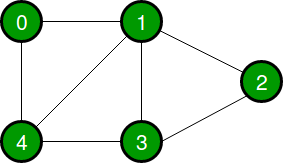

In [262]:
import numpy as np
from collections import defaultdict

class Graph_matrix():
    def __init__(self, V=0, directed = False):
        # params of the graph
        self.V = V
        self.directed = directed
        
        # adjacency matrix, 1 indicates an existing edge
        self.matrix = np.zeros((V, V))
        
        # list of vertices
        # element idx indicates id of the vertex
        # element value stores the data of the vertex, by default, same as the idx
        self.vertex_details = [None] * V
        for i in range(V):
            self.update_vertex_details(i, i)
        
    def update_vertex_details(self, idx, vertex_details):
        self.vertex_details[idx] = vertex_details
    
    def add_vertex(self, vertex_details):
        self.vertex_details.append(vertex_details)
        
        new_matrix = np.zeros((self.V + 1, self.V + 1))
        new_matrix[:self.V, :self.V] = self.matrix
        self.matrix = new_matrix
        
        self.V = salev.V + 1
        
    def add_edge(self, from_idx, to_idx):
        self.matrix[from_idx, to_idx] = 1
        
        # add edge from to_idx to from_idx for undirected graph
        if not self.directed:
            self.matrix[to_idx, from_idx] = 1
            
    def print_graph(self):
        print(f"vertices: {self.vertex_details}")
        print(f"adjacency matrix:\n {self.matrix}")
        
        
    def bfs(self, start_idx):
        print("bfs traversal of vertices:")
        visited = [False] * self.V
        queue = []
        
        queue.append(start_idx)
        visited[start_idx] = True
        
        while queue:
            node_idx = queue.pop(0)
            print(self.vertex_details[node_idx], end=" ")
            
            for idx, i in enumerate(self.matrix[node_idx]):
                if i == 1 and visited[idx] == False:
                    queue.append(idx)
                    visited[idx] = True
    
    def dfs(self, start_idx):
        def do_dfs(idx, vistied):
            result = []
            
            if not visited[idx]:
                result.append(idx)
                visited[idx] = True
                
                for neighbor_idx, edge_value in enumerate(self.matrix[idx]):
                    if edge_value == 1:
                        result = result + do_dfs(neighbor_idx, visited)
            return result
        
        visited = [False] * self.V
        result = do_dfs(start_idx, visited)
        print("\ndfs traversal of vertices:")
        print(result)
    

In [263]:
g = Graph_matrix(5)
g.add_edge(0, 1)
g.add_edge(0, 4)
g.add_edge(1, 2)
g.add_edge(1, 3)
g.add_edge(1, 4)
g.add_edge(2, 3)
g.add_edge(3, 4)

g.print_graph()

g.bfs(2)
g.dfs(2)

vertices: [0, 1, 2, 3, 4]
adjacency matrix:
 [[0. 1. 0. 0. 1.]
 [1. 0. 1. 1. 1.]
 [0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1.]
 [1. 1. 0. 1. 0.]]
bfs traversal of vertices:
2 1 3 0 4 
dfs traversal of vertices:
[2, 1, 0, 4, 3]


### Adjacency List representation

In [324]:
class Node():
    def __init__(self, id):
        self.id = id
        self.next = None
        
class Graph_adjacency_list():
    def __init__(self, V=0, directed=False):
        self.V = V
        self.directed = directed
        
        self.graph = [None] * V
    
    def add_vertix(self, id):
        self.graph.append(Node(id))
        self.V = self.V + 1
        
    def add_edge(self, src_id, desc_id):
        node = Node(desc_id)
        node.next = self.graph[src_id]
        self.graph[src_id] = node
        
        if not self.directed:
            node = Node(src_id)
            node.next = self.graph[desc_id]
            self.graph[desc_id] = node
            
    def print_graph(self):
        for id, vertex_head in enumerate(self.graph):
            temp = vertex_head
            print(f"\nAdjacency list of vertex {id}")
            while temp:
                print(f"->{temp.id}", end=" ")
                temp = temp.next
        print("")
                
    def bfs(self, src_id):        
        print("bfs traversal of vertices:")
        visited = [False] * self.V
        queue = []                
        queue.append(src_id)     
        visited[src_id] = True
        
        while queue:
            head_id = queue.pop(0)
            print(head_id, end=" ")
            visited[head_id] = True
            
            node = self.graph[head_id]              
            while node:
                if not visited[node.id]:
                    queue.append(node.id)
                    visited[node.id] = True
                node = node.next
        print("")
                
    def dfs(self, src_id):        
        def do_dfs(id, visited):
            result = []
            if not visited[id]:
                result = result + [id]
                visited[id] = True
                
                node = self.graph[id]
                while node:
                    result = result + do_dfs(node.id, visited)
                    node = node.next
            return result
        
        result = []
        visited = [False] * self.V
        result = do_dfs(src_id, visited)
        
        print("dfs traversal of vertices:")
        print(result)


In [325]:
g = Graph_adjacency_list(5)
g.add_edge(0, 1)
g.add_edge(0, 4)
g.add_edge(1, 2)
g.add_edge(1, 3)
g.add_edge(1, 4)
g.add_edge(2, 3)
g.add_edge(3, 4)

g.print_graph()

g.bfs(2)
g.dfs(2)


Adjacency list of vertex 0
->4 ->1 
Adjacency list of vertex 1
->4 ->3 ->2 ->0 
Adjacency list of vertex 2
->3 ->1 
Adjacency list of vertex 3
->4 ->2 ->1 
Adjacency list of vertex 4
->3 ->1 ->0 
bfs traversal of vertices:
2 3 1 4 0 
dfs traversal of vertices:
[2, 3, 4, 1, 0]


### Dynamic List representation

In [338]:
from collections import defaultdict

class Graph():
    def __init__(self, directed = False):
        self.graph = defaultdict(list)
        self.directed = directed
        
    def add_edge(self, src, desc):
        self.graph[src].append(desc)
        
        if not self.directed:
            self.graph[desc].append(src)
            
    def print_graph(self):
        for v, neighbors in self.graph.items():
            print(f"Adjacency list of vertex {v}")
            print(neighbors)
            
    def bfs(self, src):
        visited = {key: False for key in self.graph.keys()}
        queue = []        
        queue.append(src)
        visited[src] = True
        
        while queue:
            current = queue.pop(0)
            print(current, end=" ")            
            for neighbor in self.graph[current]:
                if not visited[neighbor]:
                    queue.append(neighbor)
                    visited[neighbor] = True
        print("")
        
    def dfs(self, src):
        def do_dfs(idx, visited):
            result = []
            if not visited[idx]:
                result = result + [idx]
                visited[idx] = True
                
                for i in self.graph[idx]:
                    result = result + do_dfs(i, visited)
            return result
        
        visited = {key: False for key in self.graph.keys()}
        result = do_dfs(src, visited)
        
        print(result)

In [339]:
graph = Graph()
graph.add_edge(0, 1)
graph.add_edge(0, 4)
graph.add_edge(1, 2)
graph.add_edge(1, 3)
graph.add_edge(1, 4)
graph.add_edge(2, 3)
graph.add_edge(3, 4)

graph.print_graph()

graph.bfs(2)
graph.dfs(2)

Adjacency list of vertex 0
[1, 4]
Adjacency list of vertex 1
[0, 2, 3, 4]
Adjacency list of vertex 4
[0, 1, 3]
Adjacency list of vertex 2
[1, 3]
Adjacency list of vertex 3
[1, 2, 4]
2 1 3 0 4 
[2, 1, 0, 4, 3]
